# The Sparks Foundation - Data Science and Business Analytics Internship


# Task 1 - Prediction Using Supervised Machine Learning

## By Joel Ayappa

Aim - To predict the percentage of a student on the basis of the number of hours studied using the Linear Regression Supervised Machine Learning Algorithm.

## **Importing the Dataset**

Here we import the dataset through the link with the help of pandas library and then observe the data.

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# To check the columns of the dataset
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
# To find the number of columns and rows
s_data.shape

(25, 2)

In [5]:
# To get information about the dataset
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# To view some basic statistical details 
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Check if our dataset contains null or missing values
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **Visualizing the Dataset**

Here we plot the dataset to fetch relation between the two variables

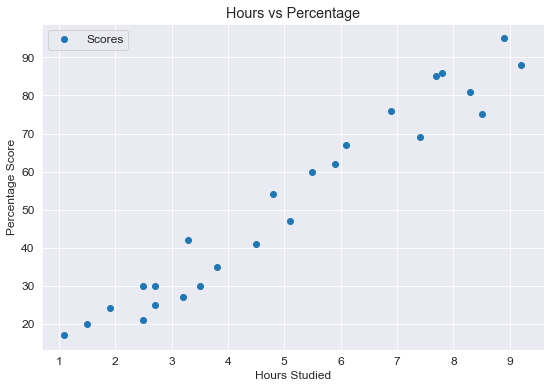

In [8]:
# Plotting the distribution of scores
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"]= 9,6
plt.rc('font', size=12)
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the above graph, we can observe that there is a linear relationship between "hours studied" and "percentage score". So we can now use the linear regression supervised machine model on it to predict further values.**

## **Preparing the Data**

Here we divide independent variable(input) as attributes('hours') and dependent variable(outpiut) as labels('score')

In [9]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## **Training the Model**

Here we split the whole dataset into 2 parts - Testing Data and Training Data and further train our Model.

In [13]:
# Splitting into testing data and training data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


## **Visualizing the Model**

Here we visualize our trained model

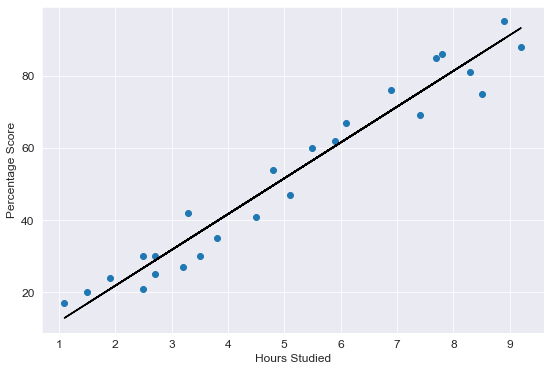

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"]= 9,6
plt.rc('font', size=12)
plt.scatter(X, y)
plt.plot(X, line, color="black");
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

## **Making Predictions**

Here we make the required predictions using our trained model 

In [16]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Estimating the Training Data and Test Data Score
print("Training score:", regressor.score(X_train, y_train))
print("Testing score:", regressor.score(X_test, y_test))

Training score: 0.9515510725211552
Testing score: 0.9454906892105355


In [22]:
# Testing the model with our own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))
print("The predicted score of a person who studies for",hours,"hours is",own_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737535
The predicted score of a person who studies for 9.25 hours is 93.69173248737535


**Conclusion - The predicted score if a person studies for 9.25 hours is 93.69173248737539**

## **Evalating the Model**

Here we evaluate our trained model by finding the accuracy and calculating mean absolute error.

In [24]:
# Finding the accuracy
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9454906892105355

In [25]:
# Calculating mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


**High accuracy value and a small value of mean absolute error concludes that the above model is a good model** 